<a href="https://colab.research.google.com/github/kvdprasad27/cloudexample/blob/master/casting_product_Image_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"

In [0]:
!mkdir .kaggle

In [0]:
!pip install kaggle

In [0]:
import json
token = {"username":"kvdprasad","key":"79a0efcfdaecbf9fbc20d8bf0cf845e2"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory


In [0]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)  280MB  2020-03-14 01:22:38           9173  
unanimad/dataisbeautiful                                    Reddit - Data is Beautiful                           10MB  2020-03-13 16:34:07            146  
rubenssjr/brasilian-houses-to-rent                          brazilian_houses_to_rent                            117KB  2020-03-15 01:12:22            153  
sudalairajkumar/novel-corona-virus-2019-dataset             Novel Corona Virus 2019 Dataset                     364KB  2020-03-17 17:00:17          54750  
kimjihoo/coronavirusdataset                                 Data

In [0]:
!kaggle datasets download -d 'ravirajsinh45/real-life-industrial-dataset-of-casting-product'

 82% 57.0M/69.1M [00:00<00:00, 69.3MB/s]
100% 69.1M/69.1M [00:00<00:00, 101MB/s] 


In [0]:
cd {/content}/datasets/

/content/{/content}/datasets


In [0]:
cd ravirajsinh45/real-life-industrial-dataset-of-casting-product/

/content/{/content}/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product


In [0]:
!mkdir data

In [0]:
! unzip real-life-industrial-dataset-of-casting-product.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/casting_data/train/def_front/cast_def_0_526.jpeg  
  inflating: data/casting_data/train/def_front/cast_def_0_5260.jpeg  
  inflating: data/casting_data/train/def_front/cast_def_0_5262.jpeg  
  inflating: data/casting_data/train/def_front/cast_def_0_5265.jpeg  
  inflating: data/casting_data/train/def_front/cast_def_0_527.jpeg  
  inflating: data/casting_data/train/def_front/cast_def_0_5270.jpeg  
  inflating: data/casting_data/train/def_front/cast_def_0_5272.jpeg  
  inflating: data/casting_data/train/def_front/cast_def_0_5274.jpeg  
  inflating: data/casting_data/train/def_front/cast_def_0_528.jpeg  
  inflating: data/casting_data/train/def_front/cast_def_0_5282.jpeg  
  inflating: data/casting_data/train/def_front/cast_def_0_5283.jpeg  
  inflating: data/casting_data/train/def_front/cast_def_0_5284.jpeg  
  inflating: data/casting_data/train/def_front/cast_def_0_5285.jpeg  
  inflating: data/casting_data/train/def_f

In [0]:
cd data/

/content/{/content}/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/data


In [0]:
cd casting_data/

/content/{/content}/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/data/casting_data


In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [0]:
ls

test/  train/


In [0]:
test_path = 'test'
train_path = 'train'
os.listdir(test_path)
os.listdir(train_path)

['ok_front', 'def_front']

In [0]:
os.listdir(test_path+'/def_front')[1]

'cast_def_0_620.jpeg'

In [0]:
os.listdir(train_path+'/def_front')[1]

'cast_def_0_4102.jpeg'

train/def_front/cast_def_0_1000.jpeg


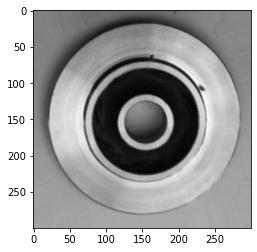

In [0]:
casting_image_cell = train_path+'/def_front'+'/cast_def_0_1000.jpeg'
print(casting_image_cell)
casting_image= imread(casting_image_cell)
plt.imshow(casting_image)

In [0]:
casting_image.shape

(300, 300, 3)

In [0]:
os.listdir(train_path+'/ok_front')[1]


'cast_ok_0_6716.jpeg'

train/ok_front/cast_ok_0_6716.jpeg


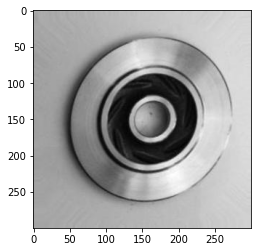

In [0]:
casting_ok_image_cell = train_path+'/ok_front'+'/cast_ok_0_6716.jpeg'
print(casting_ok_image_cell)
casting_ok_image= imread(casting_ok_image_cell)
plt.imshow(casting_ok_image)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [0]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
image_shape = (300, 300, 3)

In [0]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [0]:
batch_size = 30
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6633 images belonging to 2 classes.


In [0]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 715 images belonging to 2 classes.


In [37]:
import warnings
warnings.filterwarnings('ignore')
results = model.fit_generator(train_image_gen,epochs=25,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/25
222/222 [==============================] - 1110s 5s/step - loss: 0.6745 - acc: 0.5687 - val_loss: 0.6540 - val_acc: 0.6336
Epoch 2/25
222/222 [==============================] - 1097s 5s/step - loss: 0.5973 - acc: 0.6196 - val_loss: 0.5904 - val_acc: 0.5972
Epoch 3/25
222/222 [==============================] - 1101s 5s/step - loss: 0.5252 - acc: 0.7036 - val_loss: 0.3374 - val_acc: 0.8280
Epoch 4/25
222/222 [==============================] - 1098s 5s/step - loss: 0.2493 - acc: 0.8985 - val_loss: 0.1429 - val_acc: 0.9399
Epoch 5/25
222/222 [==============================] - 1103s 5s/step - loss: 0.1789 - acc: 0.9287 - val_loss: 0.0586 - val_acc: 0.9804
Epoch 6/25
222/222 [==============================] - 1102s 5s/step - loss: 0.1287 - acc: 0.9537 - val_loss: 0.0750 - val_acc: 0.9776
Epoch 7/25
222/222 [==============================] - 1099s 5s/step - loss: 0.0722 - acc: 0.9760 - val_loss: 0.0457 - val_acc: 0.9874
Epoch 8/25
222/222 [==============================] - 1097s 5s

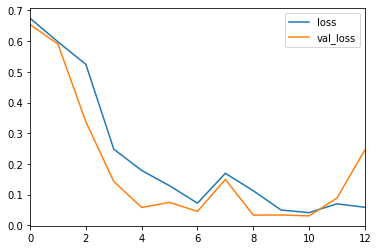

In [38]:
model.save('casting_product_batchSize20.h5')
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [39]:
model.metrics_names

['loss', 'acc']

In [40]:
model.evaluate_generator(test_image_gen)

[0.16883841035104297, 0.9552448]

In [41]:
from tensorflow.keras.preprocessing import image
pred_probabilities = model.predict_generator(test_image_gen)
pred_probabilities

array([[1.20699406e-05],
       [2.67489552e-02],
       [0.00000000e+00],
       [9.45627689e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.98023224e-07],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.74535942e-06],
       [1.51991844e-06],
       [0.00000000e+00],
       [3.57627869e-07],
       [3.18884850e-06],
       [0.00000000e+00],
       [3.57627869e-07],
       [8.94069672e-08],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.09374523e-05],
       [0.00000000e+00],
       [1.67545500e-06],
       [5.59377622e-05],
       [9.52226571e-07],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.51991844e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.95042992e-06],
       [3.25530767e-04],
       [0.00000000e+00],
       [4.94718552e-06],


In [42]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
predictions = pred_probabilities > 0.5
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       453
           1       0.99      0.87      0.92       262

    accuracy                           0.95       715
   macro avg       0.96      0.93      0.94       715
weighted avg       0.95      0.95      0.95       715



In [45]:
confusion_matrix(test_image_gen.classes,predictions)

array([[451,   2],
       [ 35, 227]])

In [46]:
os.listdir(test_path+'/def_front')[0]


'cast_def_0_2084.jpeg'

In [0]:
casting_def_image_cell = test_path+'/def_front'+'/cast_def_0_2084.jpeg'

In [52]:
os.listdir(test_path+'/ok_front')[0]


'cast_ok_0_2755.jpeg'

In [0]:
casting_ok_image_cell = test_path+'/ok_front'+'/cast_ok_0_2755.jpeg'

In [0]:
my_def_image = image.load_img(casting_def_image_cell,target_size=image_shape)
my_ok_image = image.load_img(casting_ok_image_cell,target_size=image_shape)

In [55]:
my_def_image = image.img_to_array(my_def_image)
my_ok_image = image.img_to_array(my_ok_image)

my_ok_image.shape

(300, 300, 3)

In [56]:
my_def_image = np.expand_dims(my_def_image, axis=0)
my_ok_image = np.expand_dims(my_ok_image, axis=0)
my_def_image.shape

(1, 300, 300, 3)

In [57]:
model.predict(my_def_image)

array([[0.]], dtype=float32)

In [58]:
model.predict(my_ok_image)

array([[1.]], dtype=float32)

In [59]:
train_image_gen.class_indices

{'def_front': 0, 'ok_front': 1}